<a href="https://colab.research.google.com/github/divyagunde16/64061_AML/blob/main/Text_and_sequence_G11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import keras
keras.__version__

'2.15.0'

In [83]:
from tensorflow.keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

**Trained embedding layer with training sample size = 100**

In [84]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = x_train[:100]
y_train = y_train[:100]
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


In [85]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_8 (Flatten)         (None, 1200)              0         
                                                                 
 dense_16 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
3/3 [==============================] - 1s 107ms/step - loss: 0.6928 - acc: 0.5125 - val_loss: 0.7039 - val_acc: 0.4000
Epoch 2/15
3/3 [==============================] - 0s 16ms/step - loss: 0.6680 - acc: 0.8250 - val_loss: 0.7053 - val_acc: 0.3500
Epoch 3/15
3/3 [=====

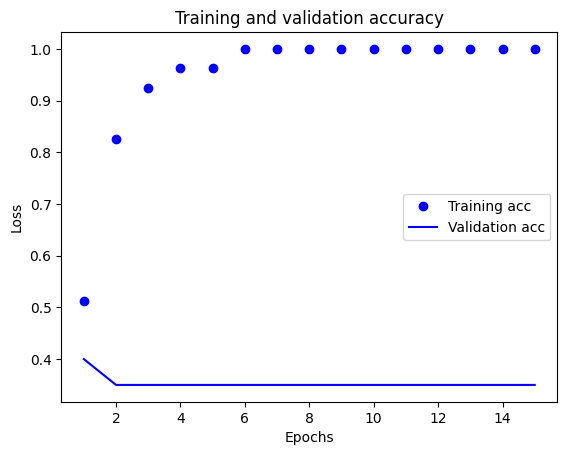

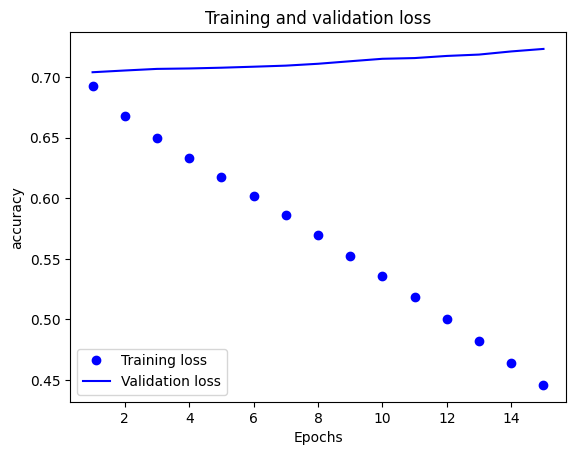

In [86]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history.history["acc"]
# Validation accuracy
validation_accuracy = history.history["val_acc"]
# Train loss
Train_loss = history.history["loss"]
# Validation loss
validation_loss = history.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label = "Training acc")
plt.plot(epochs, validation_accuracy, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.figure()

plt.plot(epochs, Train_loss, "bo", label = "Training loss")
plt.plot(epochs, validation_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [87]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)

# Print the test set accuracy
print(f"Test set accuracy: {accuracy}")

782/782 [==============================] - 2s 3ms/step - loss: 0.6979 - acc: 0.4950
Test set accuracy: 0.4950000047683716


**Trained embedding layer with training sample size = 5000**

In [88]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = x_train[:5000]
y_train = y_train[:5000]
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [89]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model1.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_9 (Flatten)         (None, 1200)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.6908 - acc: 0.5307 - val_loss: 0.6842 - val_acc: 0.5960
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.6566 - acc: 0.7197 - val_loss: 0.6481 - val_acc: 0.7240
Epoch 3/10
125/1

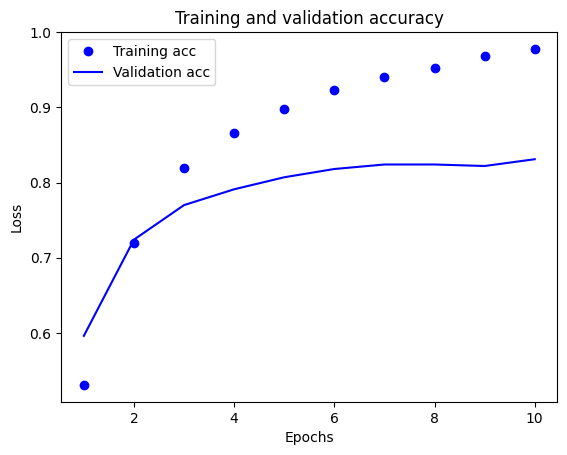

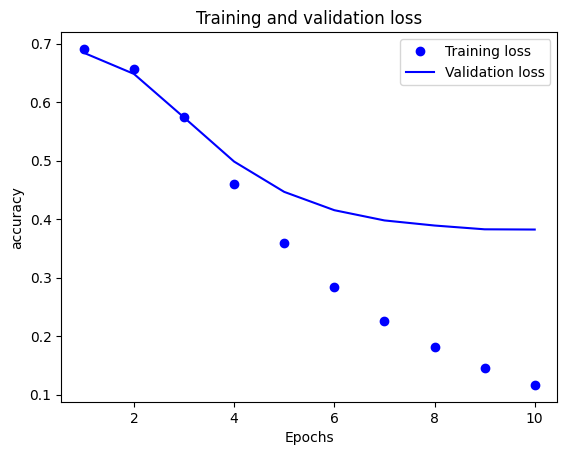

In [90]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy1 = history1.history["acc"]
# Validation accuracy
validation_accuracy1 = history1.history["val_acc"]
# Train loss
Train_loss1 = history1.history["loss"]
# Validation loss
validation_loss1 = history1.history["val_loss"]


epochs = range(1, len(accuracy1) + 1)

plt.plot(epochs, accuracy1, "bo", label = "Training acc")
plt.plot(epochs, validation_accuracy1, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.figure()

plt.plot(epochs, Train_loss1, "bo", label = "Training loss")
plt.plot(epochs, validation_loss1, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [91]:
loss1, accuracy1 = model1.evaluate(x_test, y_test)

# Print the test set accuracy
print('Test loss:', loss1)
print('Test accuracy:', accuracy1)


782/782 [==============================] - 1s 2ms/step - loss: 0.3602 - acc: 0.8380
Test loss: 0.3602210283279419
Test accuracy: 0.8380399942398071


**Trained embedding layer with training sample size = 2500**

In [92]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = x_train[:2500]
y_train = y_train[:2500]
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [93]:
model2 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model2.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model2.add(Flatten())

# We add the classifier on top
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_10 (Flatten)        (None, 1200)              0         
                                                                 
 dense_18 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 1s 6ms/step - loss: 0.6935 - acc: 0.4835 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.6750 - acc: 0.6955 - val_loss: 0.6917 - val_acc: 0.5200
Epoch 3/10
63/63 [=

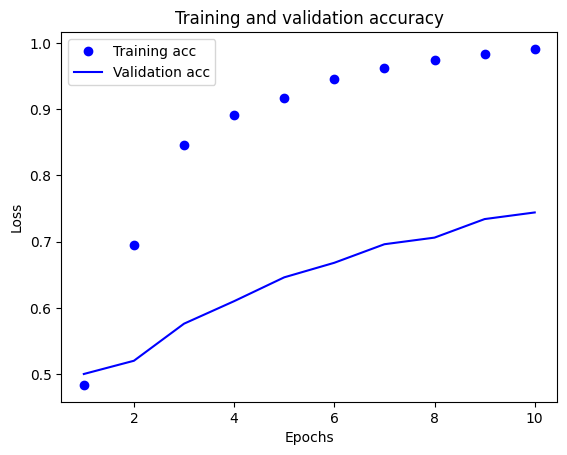

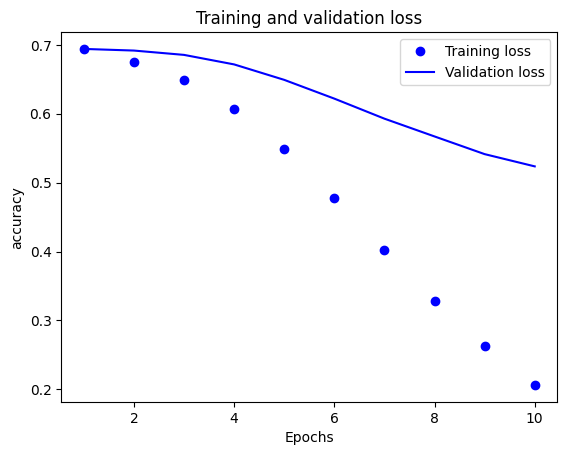

In [94]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy2 = history2.history["acc"]
# Validation accuracy
validation_accuracy2 = history2.history["val_acc"]
# Train loss
Train_loss2 = history2.history["loss"]
# Validation loss
validation_loss2 = history2.history["val_loss"]


epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, "bo", label = "Training acc")
plt.plot(epochs, validation_accuracy2, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.figure()

plt.plot(epochs, Train_loss2, "bo", label = "Training loss")
plt.plot(epochs, validation_loss2, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [95]:
loss2, accuracy2 = model2.evaluate(x_test, y_test)

# Print the test set accuracy
print('Test loss:', loss2)
print('Test accuracy:', accuracy2)

782/782 [==============================] - 1s 2ms/step - loss: 0.4878 - acc: 0.7750
Test loss: 0.4878010153770447
Test accuracy: 0.7749999761581421


**Trained embedding layer with training sample size = 10000**

In [96]:
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words
# (among top max_features most common words)
maxlen = 150

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = x_train[:10000]
y_train = y_train[:10000]
# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [97]:
model3 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model3.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model3.add(Flatten())

# We add the classifier on top
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()

history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 8)            80000     
                                                                 
 flatten_11 (Flatten)        (None, 1200)              0         
                                                                 
 dense_19 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6899 - acc: 0.5460 - val_loss: 0.6789 - val_acc: 0.6370
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6066 - acc: 0.7836 - val_loss: 0.5403 - val_acc: 0.7960
Epoch 3/10
250/

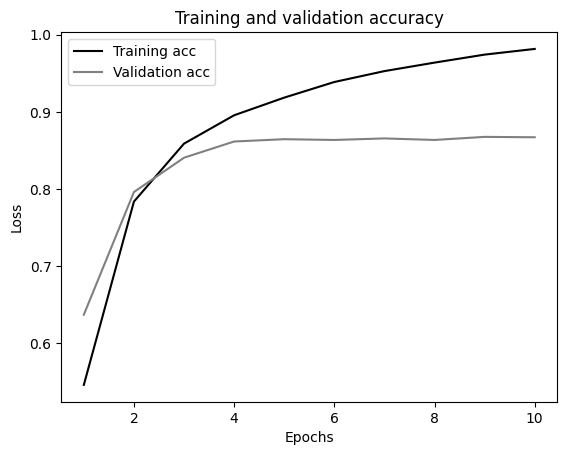

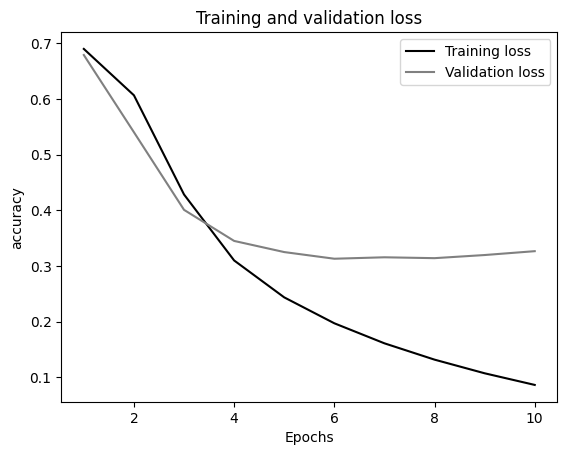

In [98]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy3 = history3.history["acc"]
# Validation accuracy
validation_accuracy3 = history3.history["val_acc"]
# Train loss
Train_loss3 = history3.history["loss"]
# Validation loss
validation_loss3 = history3.history["val_loss"]


epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.figure()

plt.plot(epochs, Train_loss3, "black", label = "Training loss")
plt.plot(epochs, validation_loss3, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [99]:
loss3, accuracy3 = model3.evaluate(x_test, y_test)

# Print the test set accuracy
print('Test loss:', loss3)
print('Test accuracy:', accuracy3)

782/782 [==============================] - 1s 1ms/step - loss: 0.3367 - acc: 0.8579
Test loss: 0.33665797114372253
Test accuracy: 0.8578799962997437


In [100]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  11.5M      0  0:00:06  0:00:06 --:--:-- 17.3M


In [101]:
!rm -r aclImdb/train/unsup

In [102]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

**Tokenize the information.**

Now that we have the texts gathered vectorized, let's set up a training and validation split. All of the ideas we covered before in this section will be used.

As task-specific embeddings are anticipated to perform better than pre-trained word embeddings in situations with limited training data, we will add a twist: we limit the training data to the first 200 samples. This is because pre-trained word embeddings are intended to be especially helpful in these situations. After examining merely 200 samples, we will therefore be able to categorize movie reviews.


**Pretrained word embedding layer with training sample size = 10000**


In [103]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 100 words
training_samples = 100  #  restricting training samples to 100
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer1 = Tokenizer(num_words=max_words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)

word_index = tokenizer1.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**GloVe word embeddings can be downloaded.**

Visit https://nlp.stanford.edu/projects/glove/ to learn more Download the pre-computed embeddings from the 2014 English Wikipedia, then visit (where you can read more about the GloVe method). The file, glove.6B.zip, is 822 MB in size and contains 100-dimensional embedding vectors for 400,000 words (or non-word tokens). Open the zip.



**Prioritize the embeddings.**

To create an index mapping words (as strings) to their vector representation (as number vectors), let's read the unzipped file (it's a txt file).


In [104]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [105]:
import os
glove_dir = '/content/gdrive/MyDrive'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [106]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Let's now construct an embedding matrix so that it may be loaded into an embedding layer. For every item i in our reference word index (created during tokenization), the embedding_dim-dimensional vector for the word at index i must be present in a matrix of shape (max_words, embedding_dim). Keep in mind that the index 0 is only a placeholder and should not represent any words or tokens.


**Define a model**

We will be using the same model architecture as before:

In [107]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_12 (Flatten)        (None, 15000)             0         
                                                                 
 dense_20 (Dense)            (None, 32)                480032    
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Fill the model with the GloVe embeddings.**

There is just one weight matrix in the embedding layer, which is a 2D float matrix with each entry denoting a word vector that should be connected to index i. Easy enough, I suppose. Simply put, let's load the GloVe matrix into our model's Embedding layer, which is the top layer:


In [108]:
model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

Furthermore, we freeze the embedding layer (setting its trainable attribute to False) based on the same reasoning you are already familiar with regarding pre-trained convnet features: pre-trained components of a model shouldn't be updated during training in order to prevent forgetting what they already know. This is especially true when it comes to our Embedding layer and our classifier, which are randomly initialized. The previously learnt features would be severely disrupted by the massive gradient change caused by the randomly started layers.

**Train and evaluate**

Let's compile our model and train it:

In [109]:
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model11.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 522ms/step - loss: 2.0611 - acc: 0.4200 - val_loss: 0.6930 - val_acc: 0.5078
Epoch 2/10
4/4 [==============================] - 1s 435ms/step - loss: 0.6312 - acc: 0.7300 - val_loss: 1.1456 - val_acc: 0.5017
Epoch 3/10
4/4 [==============================] - 1s 238ms/step - loss: 0.6872 - acc: 0.7100 - val_loss: 0.7878 - val_acc: 0.5168
Epoch 4/10
4/4 [==============================] - 1s 436ms/step - loss: 0.7977 - acc: 0.6900 - val_loss: 0.9658 - val_acc: 0.5080
Epoch 5/10
4/4 [==============================] - 1s 436ms/step - loss: 0.2378 - acc: 0.9100 - val_loss: 1.4760 - val_acc: 0.5025
Epoch 6/10
4/4 [==============================] - 1s 266ms/step - loss: 0.3332 - acc: 0.8400 - val_loss: 1.2792 - val_acc: 0.4978
Epoch 7/10
4/4 [==============================] - 1s 436ms/step - loss: 0.1285 - acc: 0.9600 - val_loss: 1.1113 - val_acc: 0.5040
Epoch 8/10
4/4 [==============================] - 1s 435ms/step - loss: 0.0590 - acc: 1.00

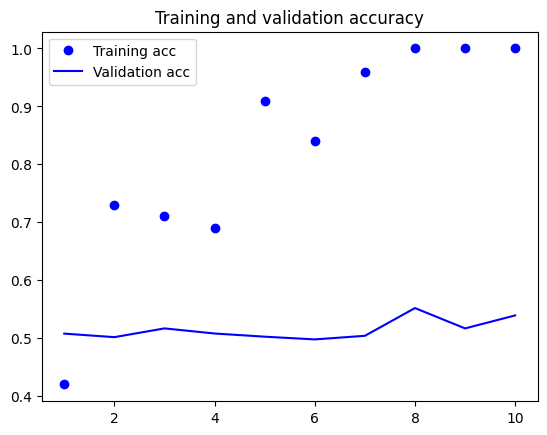

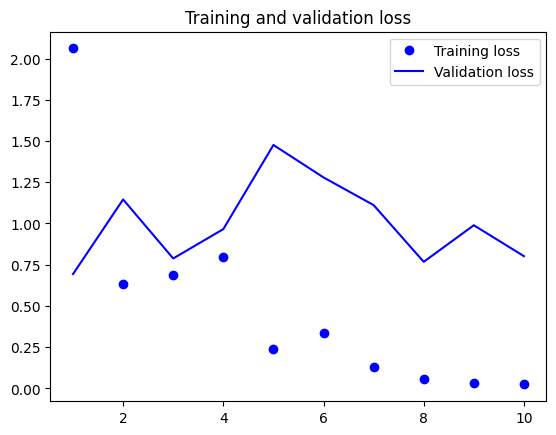

In [110]:
import matplotlib.pyplot as plt

acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

epochs = range(1, len(acc11) + 1)

plt.plot(epochs, acc11, 'bo', label='Training acc')
plt.plot(epochs, val_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss11, 'bo', label='Training loss')
plt.plot(epochs, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
loss11, acc11= model11.evaluate(x_val, y_val)
print('Test loss:', loss11)
print('Test accuracy:', acc11)

313/313 [==============================] - 1s 3ms/step - loss: 0.8017 - acc: 0.5392
Test loss: 0.8017234206199646
Test accuracy: 0.5392000079154968


**pretrained word embedding layer with training sample size = 2500**

In [112]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 100 words
training_samples = 2500  #  restricting training samples to 100
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)

word_index = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12= model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_13 (Flatten)        (None, 15000)             0         
                                                                 
 dense_22 (Dense)            (None, 32)                480032    
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
79/79 [==============================] - 3

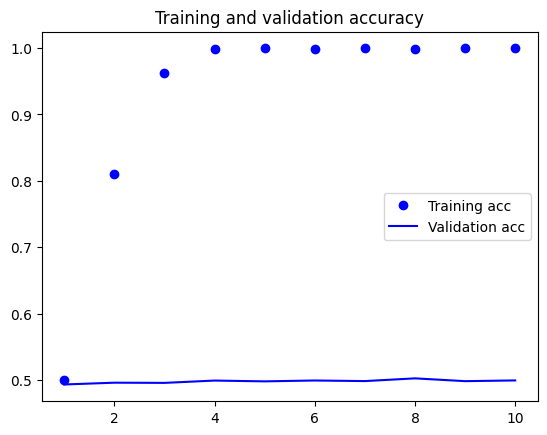

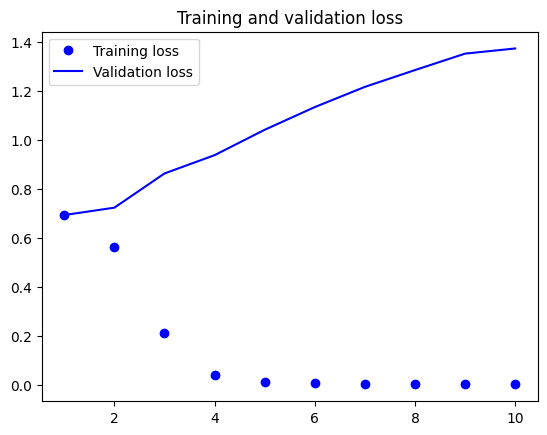

In [113]:
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'bo', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'bo', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [114]:
loss12, acc12= model12.evaluate(x_val, y_val)
print('Test loss:', loss12)
print('Test accuracy:', acc12)

313/313 [==============================] - 1s 3ms/step - loss: 1.3737 - acc: 0.4996
Test loss: 1.3736740350723267
Test accuracy: 0.49959999322891235


**Pretrained word embedding layer with training sample size = 5000**


In [115]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 100 words
training_samples = 5000  #  restricting training samples to 100
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer3 = Tokenizer(num_words=max_words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)

word_index = tokenizer3.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13= model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_14 (Flatten)        (None, 15000)             0         
                                                                 
 dense_24 (Dense)            (None, 32)                480032    
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] -

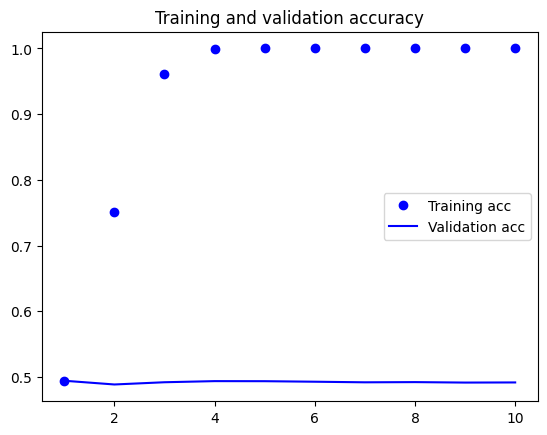

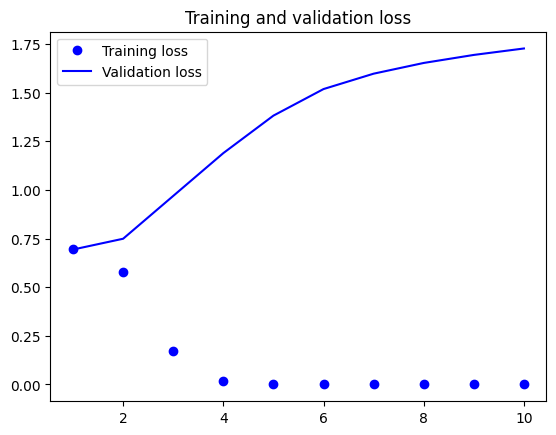

In [116]:
import matplotlib.pyplot as plt

acc13 = history13.history['acc']
val_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
val_loss13 = history13.history['val_loss']

epochs = range(1, len(acc13) + 1)

plt.plot(epochs, acc13, 'bo', label='Training acc')
plt.plot(epochs, val_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'bo', label='Training loss')
plt.plot(epochs, val_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [117]:
loss13, acc13= model13.evaluate(x_val, y_val)
print('Test loss:', loss13)
print('Test accuracy:', acc13)

313/313 [==============================] - 1s 4ms/step - loss: 1.7264 - acc: 0.4917
Test loss: 1.7264056205749512
Test accuracy: 0.4916999936103821


**Pretrained word embedding layer with training sample size = 10000**


In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 100 words
training_samples = 10000  #  restricting training samples to 100
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer4 = Tokenizer(num_words=max_words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)

word_index = tokenizer4.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model14 = Sequential()
model14.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model14.add(Flatten())
model14.add(Dense(32, activation='relu'))
model14.add(Dense(1, activation='sigmoid'))
model14.summary()

model14.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history14 = model14.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_15 (Flatten)        (None, 15000)             0         
                                                                 
 dense_26 (Dense)            (None, 32)                480032    
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] -

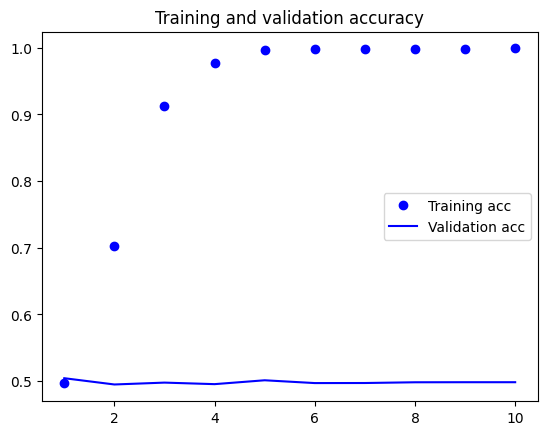

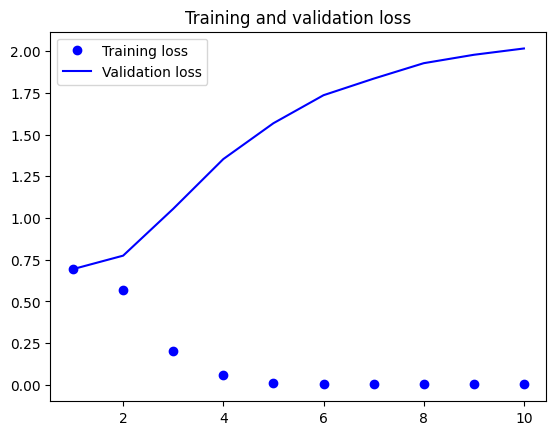

In [119]:
acc14 = history14.history['acc']
val_acc14 = history14.history['val_acc']
loss14 = history14.history['loss']
val_loss14 = history14.history['val_loss']

epochs = range(1, len(acc14) + 1)

plt.plot(epochs, acc14, 'bo', label='Training acc')
plt.plot(epochs, val_acc14, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss14, 'bo', label='Training loss')
plt.plot(epochs, val_loss14, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [120]:
loss14, acc14= model14.evaluate(x_val, y_val)
print('Test loss:', loss14)
print('Test accuracy:', acc14)

313/313 [==============================] - 1s 5ms/step - loss: 2.0156 - acc: 0.4984
Test loss: 2.0156466960906982
Test accuracy: 0.4984000027179718
